In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "carbon_footprint_supply_chain_project.xlsx"
activities = pd.read_excel(file_path, sheet_name="Activities")

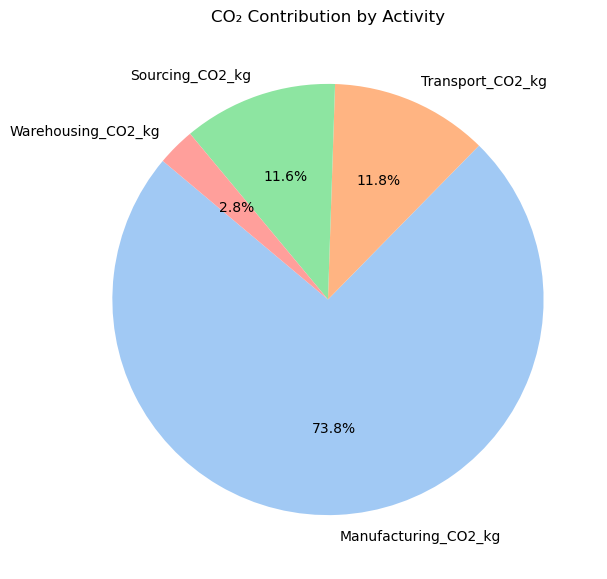

C:\Users\Hp\AppData\Local\Temp\ipykernel_40676\883941716.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_contrib.values, y=activity_contrib.index, palette="viridis")


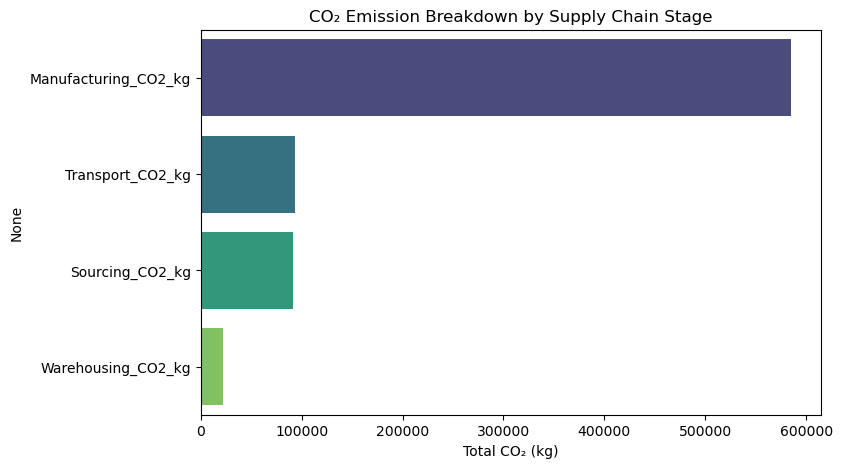

In [7]:
# -----------------------------
# 1. Overall Emission Breakdown
# -----------------------------
activity_cols = ["Sourcing_CO2_kg", "Manufacturing_CO2_kg", "Warehousing_CO2_kg", "Transport_CO2_kg"]
activity_contrib = activities[activity_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(7,7))
plt.pie(activity_contrib, labels=activity_contrib.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("CO₂ Contribution by Activity")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=activity_contrib.values, y=activity_contrib.index, palette="viridis")
plt.title("CO₂ Emission Breakdown by Supply Chain Stage")
plt.xlabel("Total CO₂ (kg)")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_40676\431176164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supplier_emissions.values, y=supplier_emissions.index, palette="Reds_r")


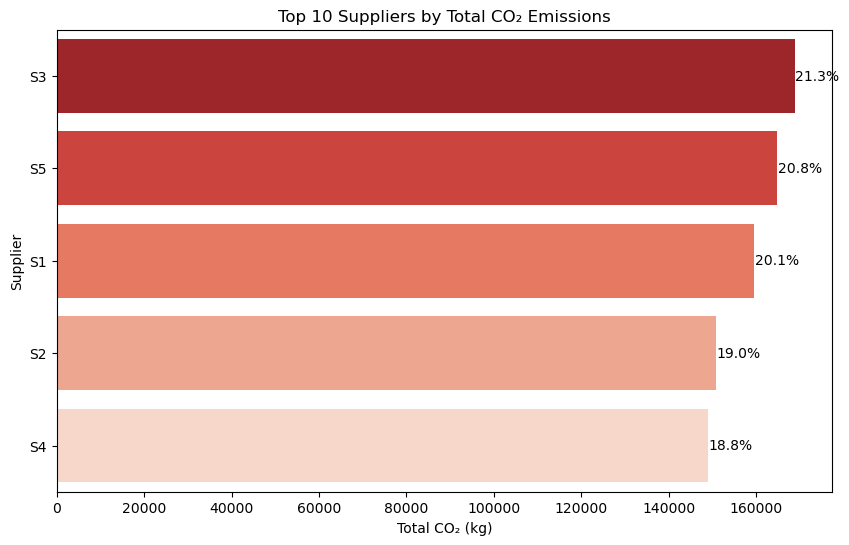

In [9]:
# -----------------------------
# 2. Supplier Impact Analysis
# -----------------------------
supplier_emissions = activities.groupby("Supplier")["Total_CO2_kg"].sum().sort_values(ascending=False).head(10)
supplier_pct = supplier_emissions / activities["Total_CO2_kg"].sum() * 100

plt.figure(figsize=(10,6))
sns.barplot(x=supplier_emissions.values, y=supplier_emissions.index, palette="Reds_r")
for i, v in enumerate(supplier_pct):
    plt.text(supplier_emissions.values[i]+100, i, f"{v:.1f}%", va="center")
plt.title("Top 10 Suppliers by Total CO₂ Emissions")
plt.xlabel("Total CO₂ (kg)")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_40676\1914687341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_emissions.values, y=city_emissions.index, palette="Blues_r")


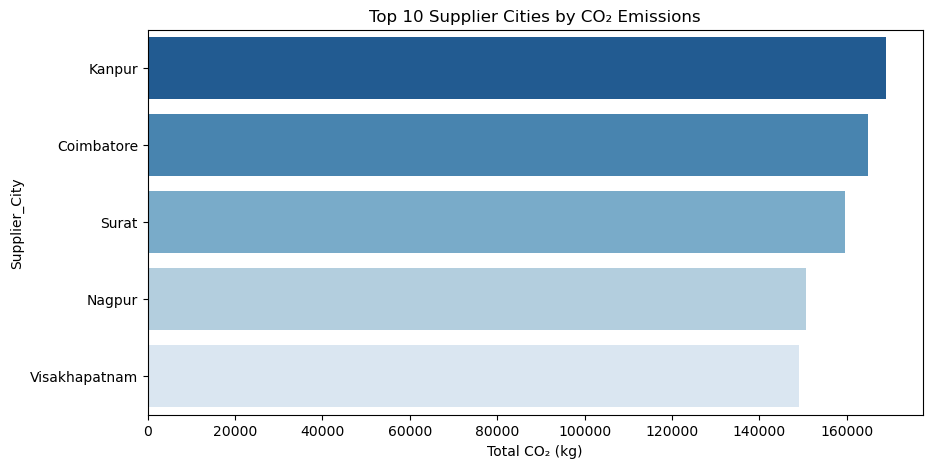

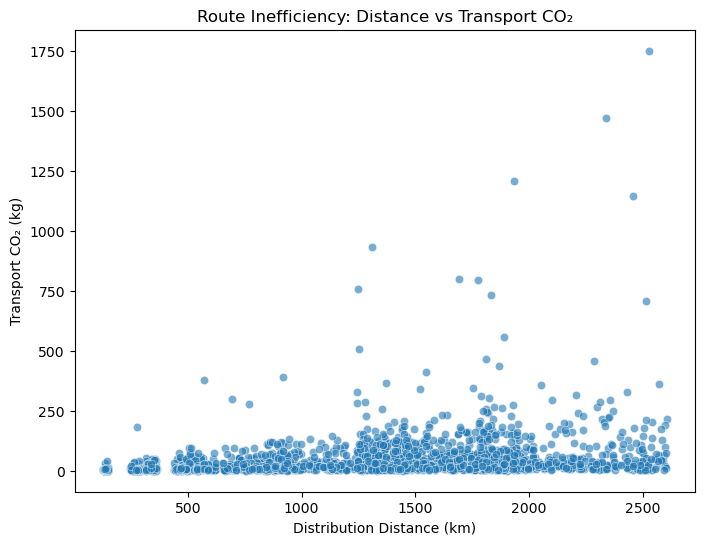

In [11]:
# -----------------------------
# 3. City & Route Hotspots
# -----------------------------
city_emissions = activities.groupby("Supplier_City")["Total_CO2_kg"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_emissions.values, y=city_emissions.index, palette="Blues_r")
plt.title("Top 10 Supplier Cities by CO₂ Emissions")
plt.xlabel("Total CO₂ (kg)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=activities["Dist_km_Distribution"], y=activities["Transport_CO2_kg"], alpha=0.6)
plt.title("Route Inefficiency: Distance vs Transport CO₂")
plt.xlabel("Distribution Distance (km)")
plt.ylabel("Transport CO₂ (kg)")
plt.show()

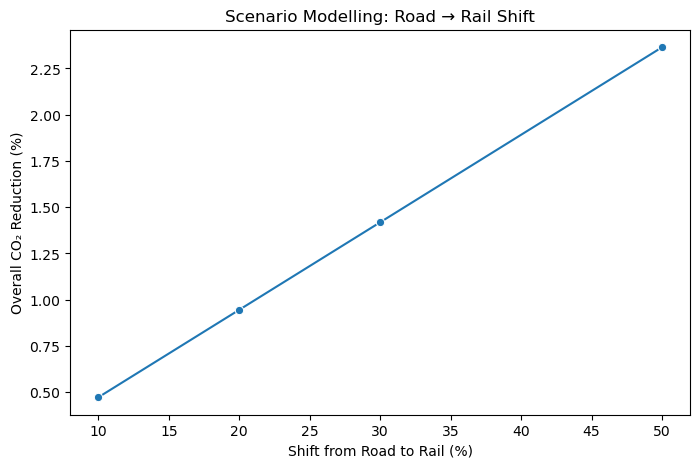

In [13]:
# -----------------------------
# 4. Scenario Modelling (Road → Rail)
# -----------------------------
# Treat all current transport as road if no mode column exists
road_emissions = activities["Transport_CO2_kg"].sum()

rail_factor = 0.6  # assume rail emits 40% less
scenarios = [0.1, 0.2, 0.3, 0.5]  # 10%, 20%, 30%, 50% shift
reductions = []

for s in scenarios:
    projected_transport = (road_emissions * (1-s)) + (road_emissions * s * rail_factor)
    reduction_transport = road_emissions - projected_transport
    overall_reduction = reduction_transport / activities["Total_CO2_kg"].sum() * 100
    reductions.append(overall_reduction)

plt.figure(figsize=(8,5))
sns.lineplot(x=[s*100 for s in scenarios], y=reductions, marker="o")
plt.title("Scenario Modelling: Road → Rail Shift")
plt.xlabel("Shift from Road to Rail (%)")
plt.ylabel("Overall CO₂ Reduction (%)")
plt.show()

In [15]:
# -----------------------------
# 5. Product-Level Efficiency
# -----------------------------
efficiency = activities.groupby("Product_ID")[["CO2_per_Unit_kg", "CO2_per_Ton_kg"]].mean().sort_values("CO2_per_Ton_kg", ascending=False).head(10)
print("Top 10 Products by CO₂ Intensity (per ton):")
print(efficiency)

Top 10 Products by CO₂ Intensity (per ton):
            CO2_per_Unit_kg  CO2_per_Ton_kg
Product_ID                                 
P400               0.617591     2058.636738
P200               0.390606     1953.028434
P300               0.778009     1556.017568
P100               1.228224     1228.223988
P500               1.581663     1054.442008


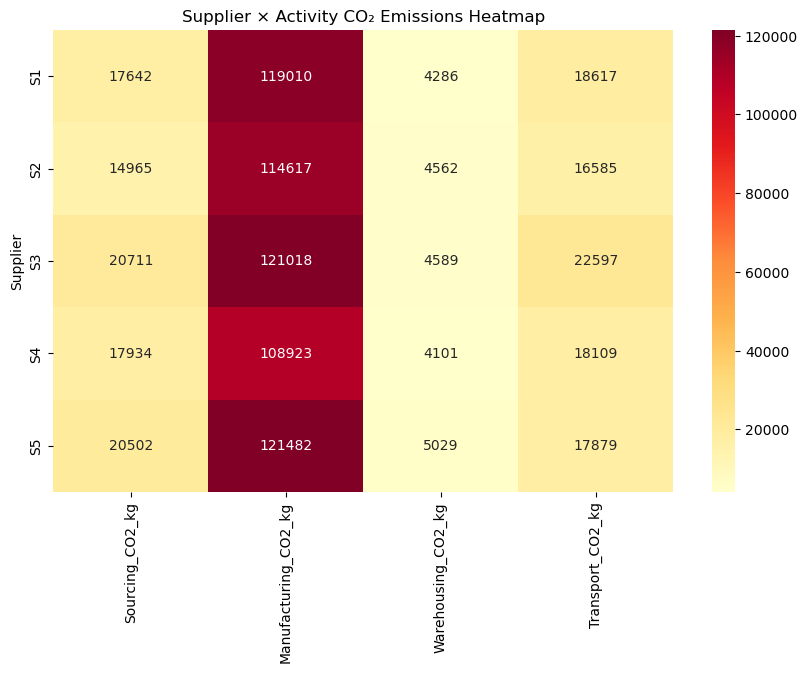

In [17]:
# -----------------------------
# 6. Supplier × Activity Heatmap
# -----------------------------
supplier_activity = activities.groupby("Supplier")[activity_cols].sum()

plt.figure(figsize=(10,6))
sns.heatmap(supplier_activity, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Supplier × Activity CO₂ Emissions Heatmap")
plt.show()
